In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import matplotlib.patheffects as path_effects
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import clear_output, display
import sys
sys.path.append('../scripts') 
from functions import *
from config import nutrient_info, conversion_factors, origin_map
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df_food = pd.read_csv('../data/df_food_filtered_with_food_group.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_10024\1199098672.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv('../data/df_food_filtered_with_food_group.csv')


In [8]:
df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_10024\2711278687.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')


In [9]:
df_food = df_food[df_food["eaten_quantity_in_gram"] > 30]
df_food = df_food[df_food["energy_kcal_eaten"] > 30]

In [10]:
# assign _eaten to water to add to the nutrient list 
df_food = df_food.assign(
    water_eaten = df_food['water']
)

In [11]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [12]:
df_food_clean = filter_implausible_nutrients(df_food, nutrient_info, conversion_factors, max_dri_multiplier=3)


Nutrient: folate_eaten
Raw max: 0.00128 mcg
Converted max: 1280.0 mcg
UL: 1000
Rows exceeding UL: 4

Nutrient: niacin_eaten
Raw max: 0.11 mg
Converted max: 110.0 mg
UL: 900
Rows exceeding UL: 0

Nutrient: pantothenic_acid_eaten
Raw max: 0.395 mg
Converted max: 395.0 mg
UL: None
Rows exceeding 3x DRI: 727

Nutrient: vitamin_b2_eaten
Raw max: 0.272 mg
Converted max: 272.0 mg
UL: None
Rows exceeding 3x DRI: 767

Nutrient: vitamin_b1_eaten
Raw max: 0.438 mg
Converted max: 438.0 mg
UL: None
Rows exceeding 3x DRI: 1618

Nutrient: all_trans_retinol_equivalents_activity_eaten
Raw max: 31970.0 IU
Converted max: 31970.0 IU
UL: 3000
Rows exceeding UL: 57

Nutrient: vitamin_b12_eaten
Raw max: 0.0001265 mcg
Converted max: 126.50000000000001 mcg
UL: None
Rows exceeding 3x DRI: 788

Nutrient: vitamin_b6_eaten
Raw max: 0.376 mg
Converted max: 376.0 mg
UL: 12
Rows exceeding UL: 1138

Nutrient: vitamin_c_eaten
Raw max: 0.75 mg
Converted max: 750.0 mg
UL: None
Rows exceeding 3x DRI: 148

Nutrient: vitam

In [13]:
df_food

,Unnamed: 0,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,...,vitamin_b2_eaten,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,vitamin_e_activity_eaten,zinc_eaten,start_date,cohort,food_group,water_eaten
0,0,13,NaN,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,...,0.000275,0.000154,0.00000,0.000000e+00,0.220,0.004730,2022-02-04,cohort_b,meat_fish_seafood,66.8
1,3,13,NaN,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,...,0.000250,0.000140,0.00000,0.000000e+00,0.200,0.004300,2023-01-10,cohort_b,meat_fish_seafood,66.8
12,14,25,NaN,386840,75.00,g,ur7t3x,2022-09-23 10:47:40,120,1,...,0.000023,0.000060,0.00675,0.000000e+00,0.075,0.000075,2022-08-30,cohort_c,fruits,86.5
13,15,25,NaN,284640,70.00,g,z95nmg,2021-10-23 15:49:28,180,1,...,0.000021,0.000056,0.00630,0.000000e+00,0.070,0.000070,2021-10-11,cohort_c,fruits,86.5
18,23,26,NaN,126878,40.00,g,uwbvad,2020-06-05 09:53:29,120,1,...,0.000008,0.000028,0.00324,0.000000e+00,0.036,0.000040,2020-05-23,cohort_b,fruits,77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399805,514941,46480,4311501442258,423068,45.00,g,a72fbq,2023-02-22 17:08:50,60,0,...,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-02-08,cohort_b,bread_pastries,NaN
399817,514953,46528,7610200337689,421454,500.00,ml,kmxhmz,2023-02-16 06:56:02,60,1,...,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-02-12,cohort_b,sweetened_beverages,NaN
399818,514954,46572,8853333016284,422430,200.00,ml,xek94s,2023-02-19 12:43:21,60,0,...,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-02-10,cohort_b,vegetable_fruit_juices,NaN
399821,514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,...,0.000210,0.000000,0.00000,7.500000e-07,0.000,0.000000,2023-02-12,cohort_b,yogurt_fresh_dairy,NaN


In [14]:
df_food_clean

,Unnamed: 0,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,...,vitamin_b2_eaten,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,vitamin_e_activity_eaten,zinc_eaten,start_date,cohort,food_group,water_eaten
0,0,13,NaN,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,...,0.000275,0.000154,0.00000,0.000000e+00,0.220,0.004730,2022-02-04,cohort_b,meat_fish_seafood,66.8
1,3,13,NaN,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,...,0.000250,0.000140,0.00000,0.000000e+00,0.200,0.004300,2023-01-10,cohort_b,meat_fish_seafood,66.8
12,14,25,NaN,386840,75.00,g,ur7t3x,2022-09-23 10:47:40,120,1,...,0.000023,0.000060,0.00675,0.000000e+00,0.075,0.000075,2022-08-30,cohort_c,fruits,86.5
13,15,25,NaN,284640,70.00,g,z95nmg,2021-10-23 15:49:28,180,1,...,0.000021,0.000056,0.00630,0.000000e+00,0.070,0.000070,2021-10-11,cohort_c,fruits,86.5
18,23,26,NaN,126878,40.00,g,uwbvad,2020-06-05 09:53:29,120,1,...,0.000008,0.000028,0.00324,0.000000e+00,0.036,0.000040,2020-05-23,cohort_b,fruits,77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399805,514941,46480,4311501442258,423068,45.00,g,a72fbq,2023-02-22 17:08:50,60,0,...,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-02-08,cohort_b,bread_pastries,NaN
399817,514953,46528,7610200337689,421454,500.00,ml,kmxhmz,2023-02-16 06:56:02,60,1,...,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-02-12,cohort_b,sweetened_beverages,NaN
399818,514954,46572,8853333016284,422430,200.00,ml,xek94s,2023-02-19 12:43:21,60,0,...,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-02-10,cohort_b,vegetable_fruit_juices,NaN
399821,514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,...,0.000210,0.000000,0.00000,7.500000e-07,0.000,0.000000,2023-02-12,cohort_b,yogurt_fresh_dairy,NaN


In [15]:
df_food_clean_ratio = calculate_ratios(df_food_clean.fillna(0), list(nutrient_info.keys()))
df_food_clean_scaled = scale(df_food_clean_ratio.fillna(0), list(nutrient_info.keys()), scaling_factor=2000)

In [16]:
df_food_clean_ratio['QI'] = df_food_clean_ratio.apply(compute_index, axis=1, nutrient_cols=qualifying_nutrients)
df_food_clean_scaled['QI'] = df_food_clean_ratio.apply(compute_index, axis=1, nutrient_cols=qualifying_nutrients)

In [17]:
df_food_clean_ratio['DI'] = df_food_clean_ratio.apply(compute_index, axis=1, nutrient_cols=disqualifying_nutrients)
df_food_clean_scaled['DI'] = df_food_clean_ratio.apply(compute_index, axis=1, nutrient_cols=disqualifying_nutrients)

In [18]:
df_food_clean_ratio['NB'] = df_food_clean_scaled.apply(compute_nb, axis=1, nutrient_cols=qualifying_nutrients)
df_food_clean_scaled['NB'] = df_food_clean_scaled.apply(compute_nb, axis=1, nutrient_cols=qualifying_nutrients)

In [19]:
df_food_clean_scaled[['QI', 'DI','NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
sweetened_beverages,0.039683,0.664300,3.968254
alcoholic_beverages,0.067630,0.007668,6.763010
sweets_desserts,0.091210,0.863140,8.189491
salty_snacks,0.123376,0.520340,10.000000
cooked_grains_pasta,0.144375,0.517566,10.191253
vegetable_fruit_juices,0.164623,0.615385,12.787068
soups_sauces_condiments,0.196627,1.371732,12.596747
beverages,0.209669,0.819755,14.112808
vegetable_oils,0.231921,0.694173,5.250201


In [20]:
df_food_clean.to_csv('../data/df_food_clean.csv', index=False)
df_food_clean_scaled.to_csv('../data/df_food_clean_scaled.csv', index=False)

In [21]:
for i in qualifying_nutrients:
    print(i, df_food_scaled.drop_duplicates('combined_name')[f'{i}_ratio'].describe().loc["max"].round())

folate_eaten 3.0
niacin_eaten 6.0
pantothenic_acid_eaten 63.0
vitamin_b2_eaten 166.0
vitamin_b1_eaten 208.0
all_trans_retinol_equivalents_activity_eaten 10.0
vitamin_b12_eaten 27.0
vitamin_b6_eaten 188.0
vitamin_c_eaten 10.0
vitamin_d_eaten 3.0
vitamin_e_activity_eaten 25.0
calcium_eaten 3.0
iron_eaten 55.0
magnesium_eaten 4.0
phosphorus_eaten 2.0
potassium_eaten 2.0
zinc_eaten 3.0
fiber_eaten 2.0
protein_eaten 4.0
water_eaten 0.0


In [22]:
for i in qualifying_nutrients:
    print(i, df_food_clean_scaled.drop_duplicates('combined_name')[f'{i}_ratio'].describe().loc["max"].round())

folate_eaten 1.0
niacin_eaten 2.0
pantothenic_acid_eaten 1.0
vitamin_b2_eaten 3.0
vitamin_b1_eaten 2.0
all_trans_retinol_equivalents_activity_eaten 2.0
vitamin_b12_eaten 3.0
vitamin_b6_eaten 9.0
vitamin_c_eaten 3.0
vitamin_d_eaten 2.0
vitamin_e_activity_eaten 3.0
calcium_eaten 2.0
iron_eaten 1.0
magnesium_eaten 1.0
phosphorus_eaten 2.0
potassium_eaten 1.0
zinc_eaten 2.0
fiber_eaten 2.0
protein_eaten 3.0
water_eaten 0.0


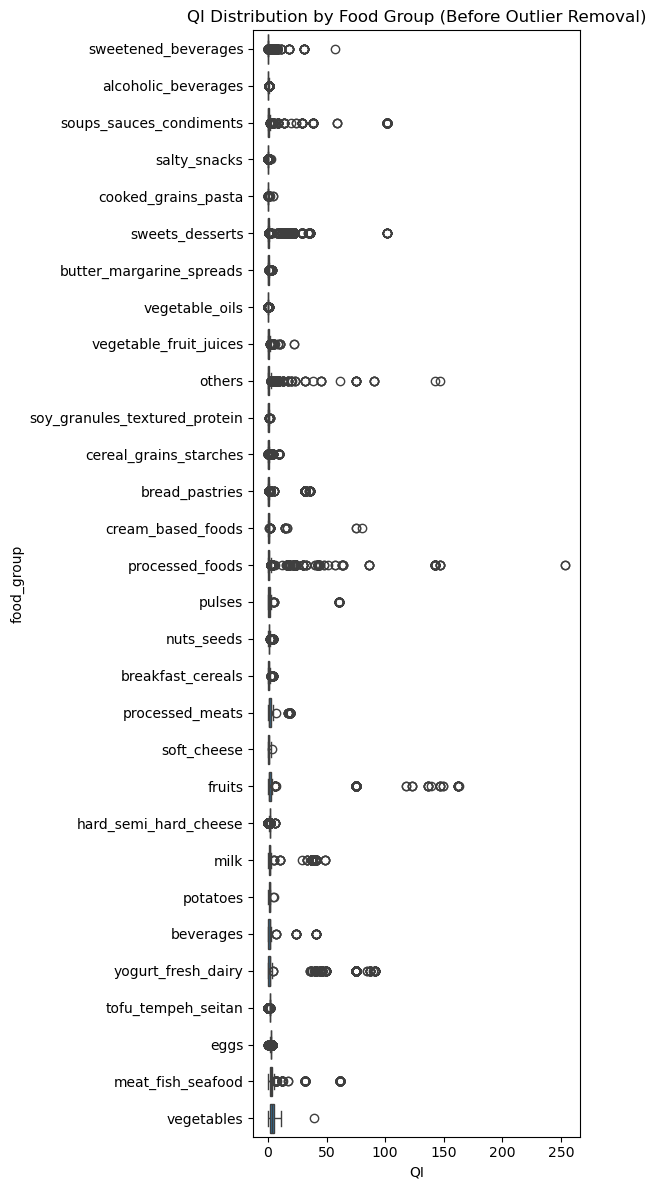

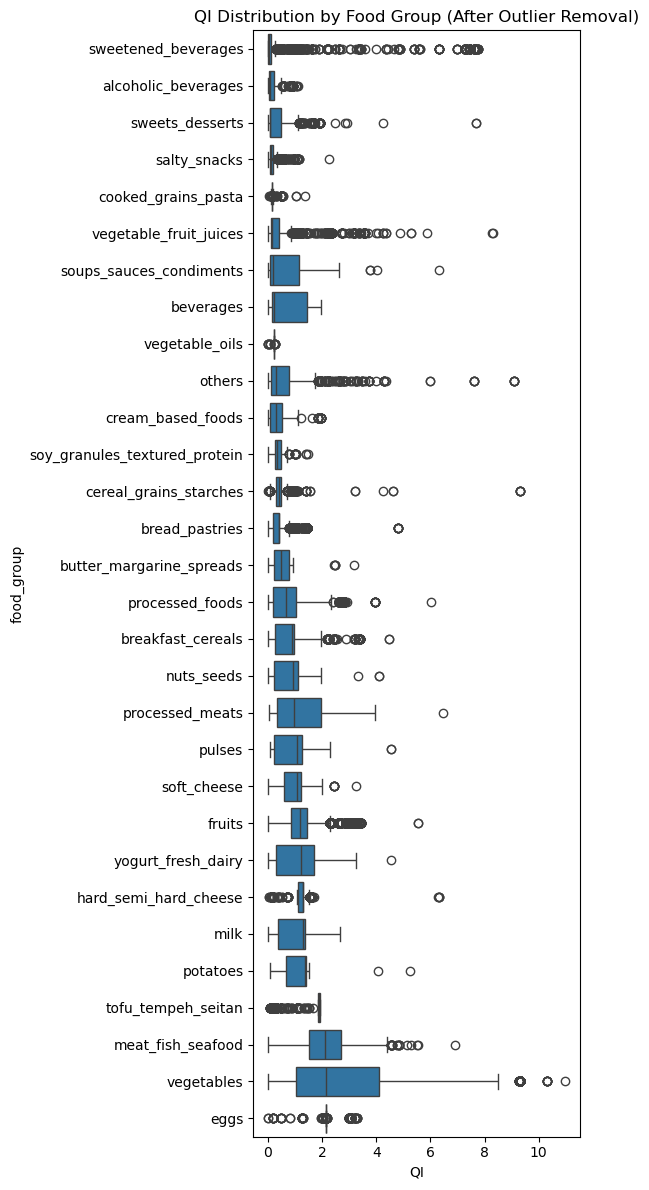

In [23]:
output_direction = "graphs"

plt.figure(figsize=(6, 12))
order = df_food_scaled.groupby('food_group')['QI'].median().sort_values().index
sns.boxplot(x='QI', y='food_group', data=df_food_scaled, order=order)
plt.title("QI Distribution by Food Group (Before Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "QI Distribution by Food Group (Before Outlier Removal).png")
plt.savefig(output_path)
plt.show()


plt.figure(figsize=(6, 12))
order_clean = df_food_clean_scaled.groupby('food_group')['QI'].median().sort_values().index
sns.boxplot(x='QI', y='food_group', data=df_food_clean_scaled, order=order_clean)
plt.title("QI Distribution by Food Group (After Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "QI Distribution by Food Group (After Outlier Removal).png")
plt.savefig(output_path)
plt.show()

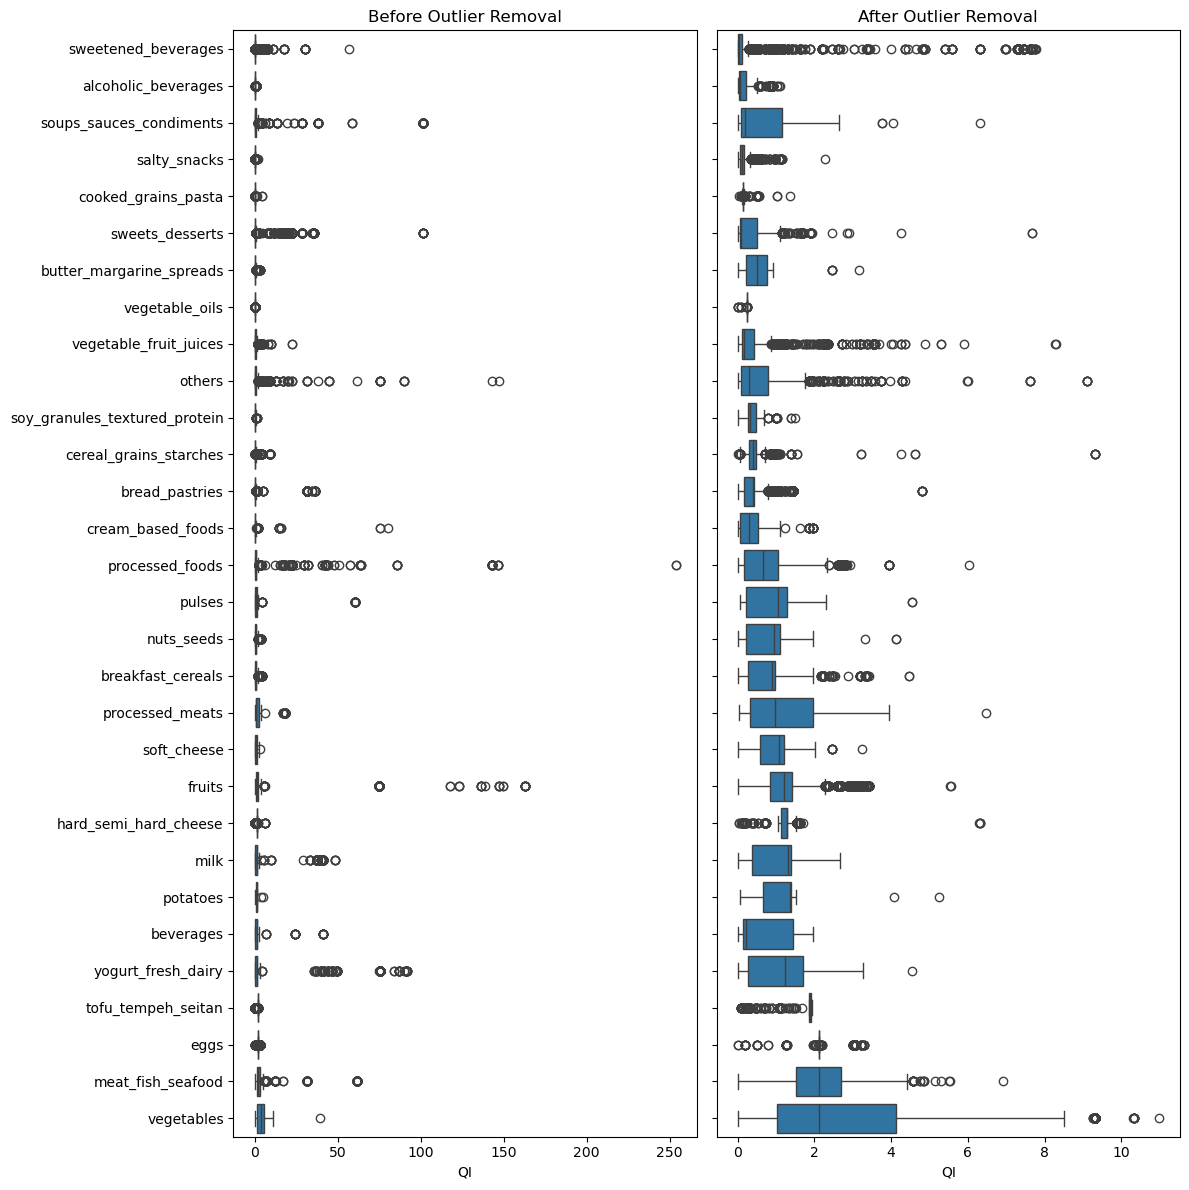

In [24]:
order = (
    df_food_scaled
    .groupby('food_group')['QI']
    .median()
    .sort_values()
    .index
)

# Create a single figure with two horizontal subplots sharing the y-axis
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 12))

# Left: before outlier removal
sns.boxplot(
    x='QI', y='food_group',
    data=df_food_scaled,
    order=order,
    ax=axes[0],
    orient='h'
)
axes[0].set_title("Before Outlier Removal")
axes[0].set_xlabel("QI")
axes[0].set_ylabel("")  # hide redundant label

# Right: after outlier removal
sns.boxplot(
    x='QI', y='food_group',
    data=df_food_clean_scaled,
    order=order,            # use the same order!
    ax=axes[1],
    orient='h'
)
axes[1].set_title("After Outlier Removal")
axes[1].set_xlabel("QI")
axes[1].set_ylabel("")  # no label on second subplot

plt.tight_layout()
plt.show()

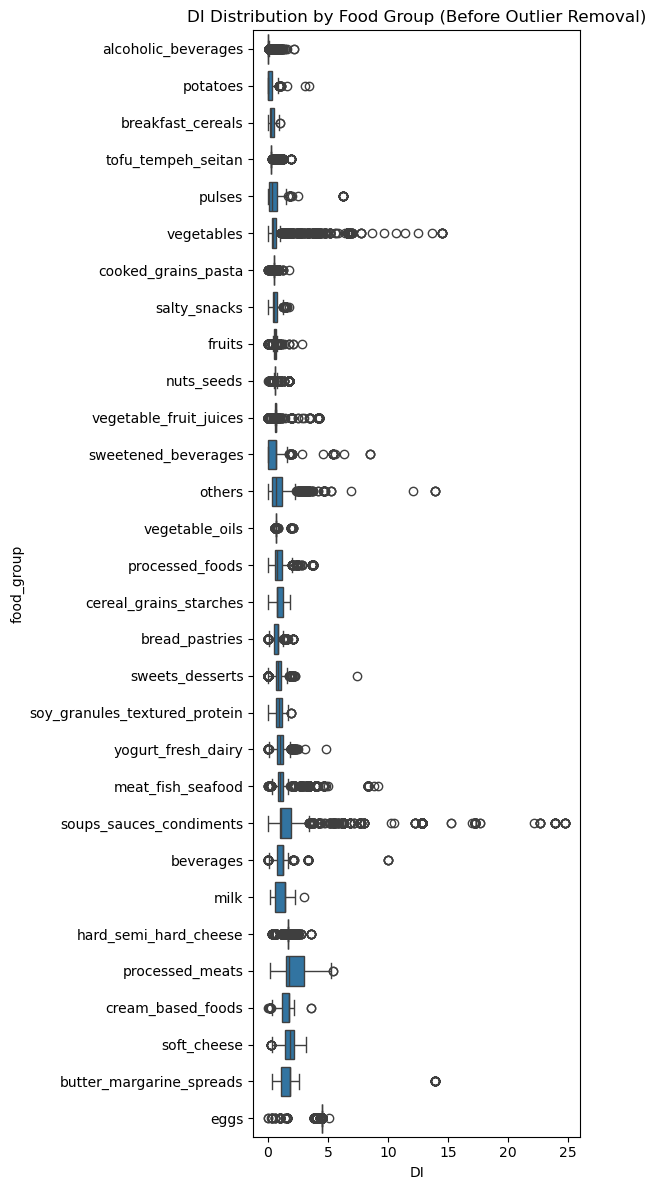

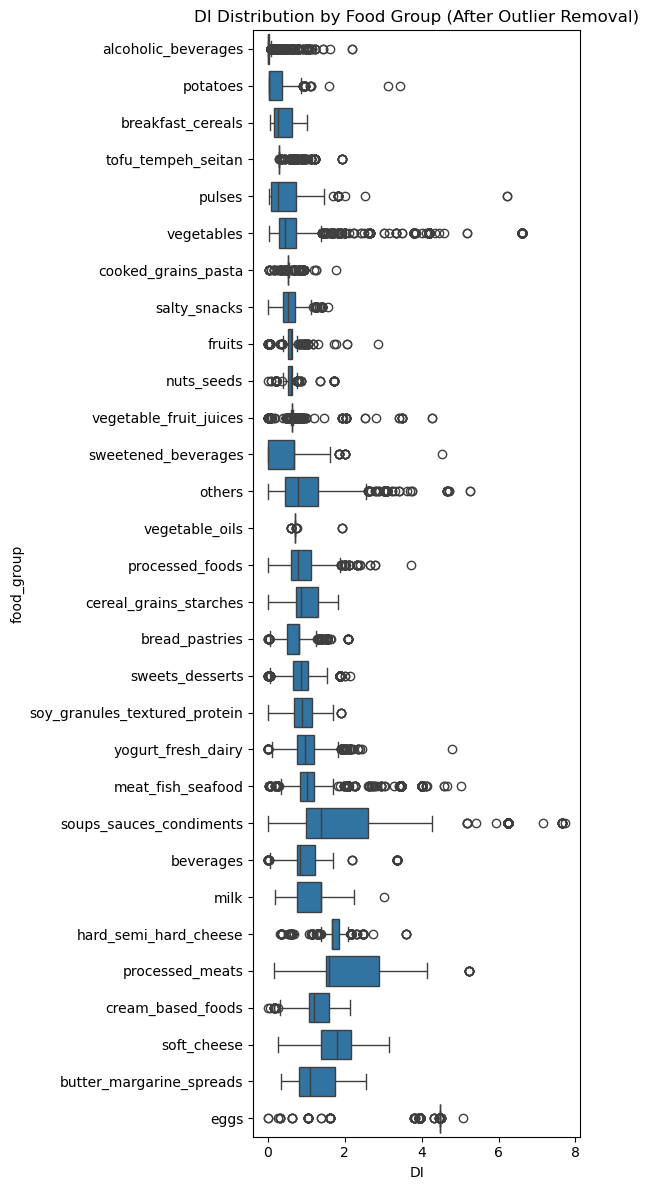

In [25]:
output_direction = "graphs"

plt.figure(figsize=(6, 12))
order = df_food_scaled.groupby('food_group')['DI'].median().sort_values().index
sns.boxplot(x='DI', y='food_group', data=df_food_scaled, order=order)
plt.title("DI Distribution by Food Group (Before Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "DI Distribution by Food Group (Before Outlier Removal).png")
plt.savefig(output_path)
plt.show()


plt.figure(figsize=(6, 12))
order_clean = df_food_clean_scaled.groupby('food_group')['DI'].median().sort_values().index
sns.boxplot(x='DI', y='food_group', data=df_food_clean_scaled, order=order)
plt.title("DI Distribution by Food Group (After Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "DI Distribution by Food Group (After Outlier Removal).png")
plt.savefig(output_path)
plt.show()

In [26]:
df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
sweetened_beverages,0.055006,0.664300,5.000000
alcoholic_beverages,0.067630,0.007668,6.723460
soups_sauces_condiments,0.098568,1.068889,8.033738
salty_snacks,0.126519,0.526942,10.000000
cooked_grains_pasta,0.144388,0.517566,10.240210
sweets_desserts,0.169476,0.863140,14.164075
butter_margarine_spreads,0.217511,1.837749,11.120121
vegetable_oils,0.231921,0.694173,5.250201
vegetable_fruit_juices,0.244367,0.626646,12.787068


In [27]:
df_food_scaled['origin'] = df_food_scaled['food_group'].map(origin_map)
df_food_clean_scaled['origin'] = df_food_clean_scaled['food_group'].map(origin_map)

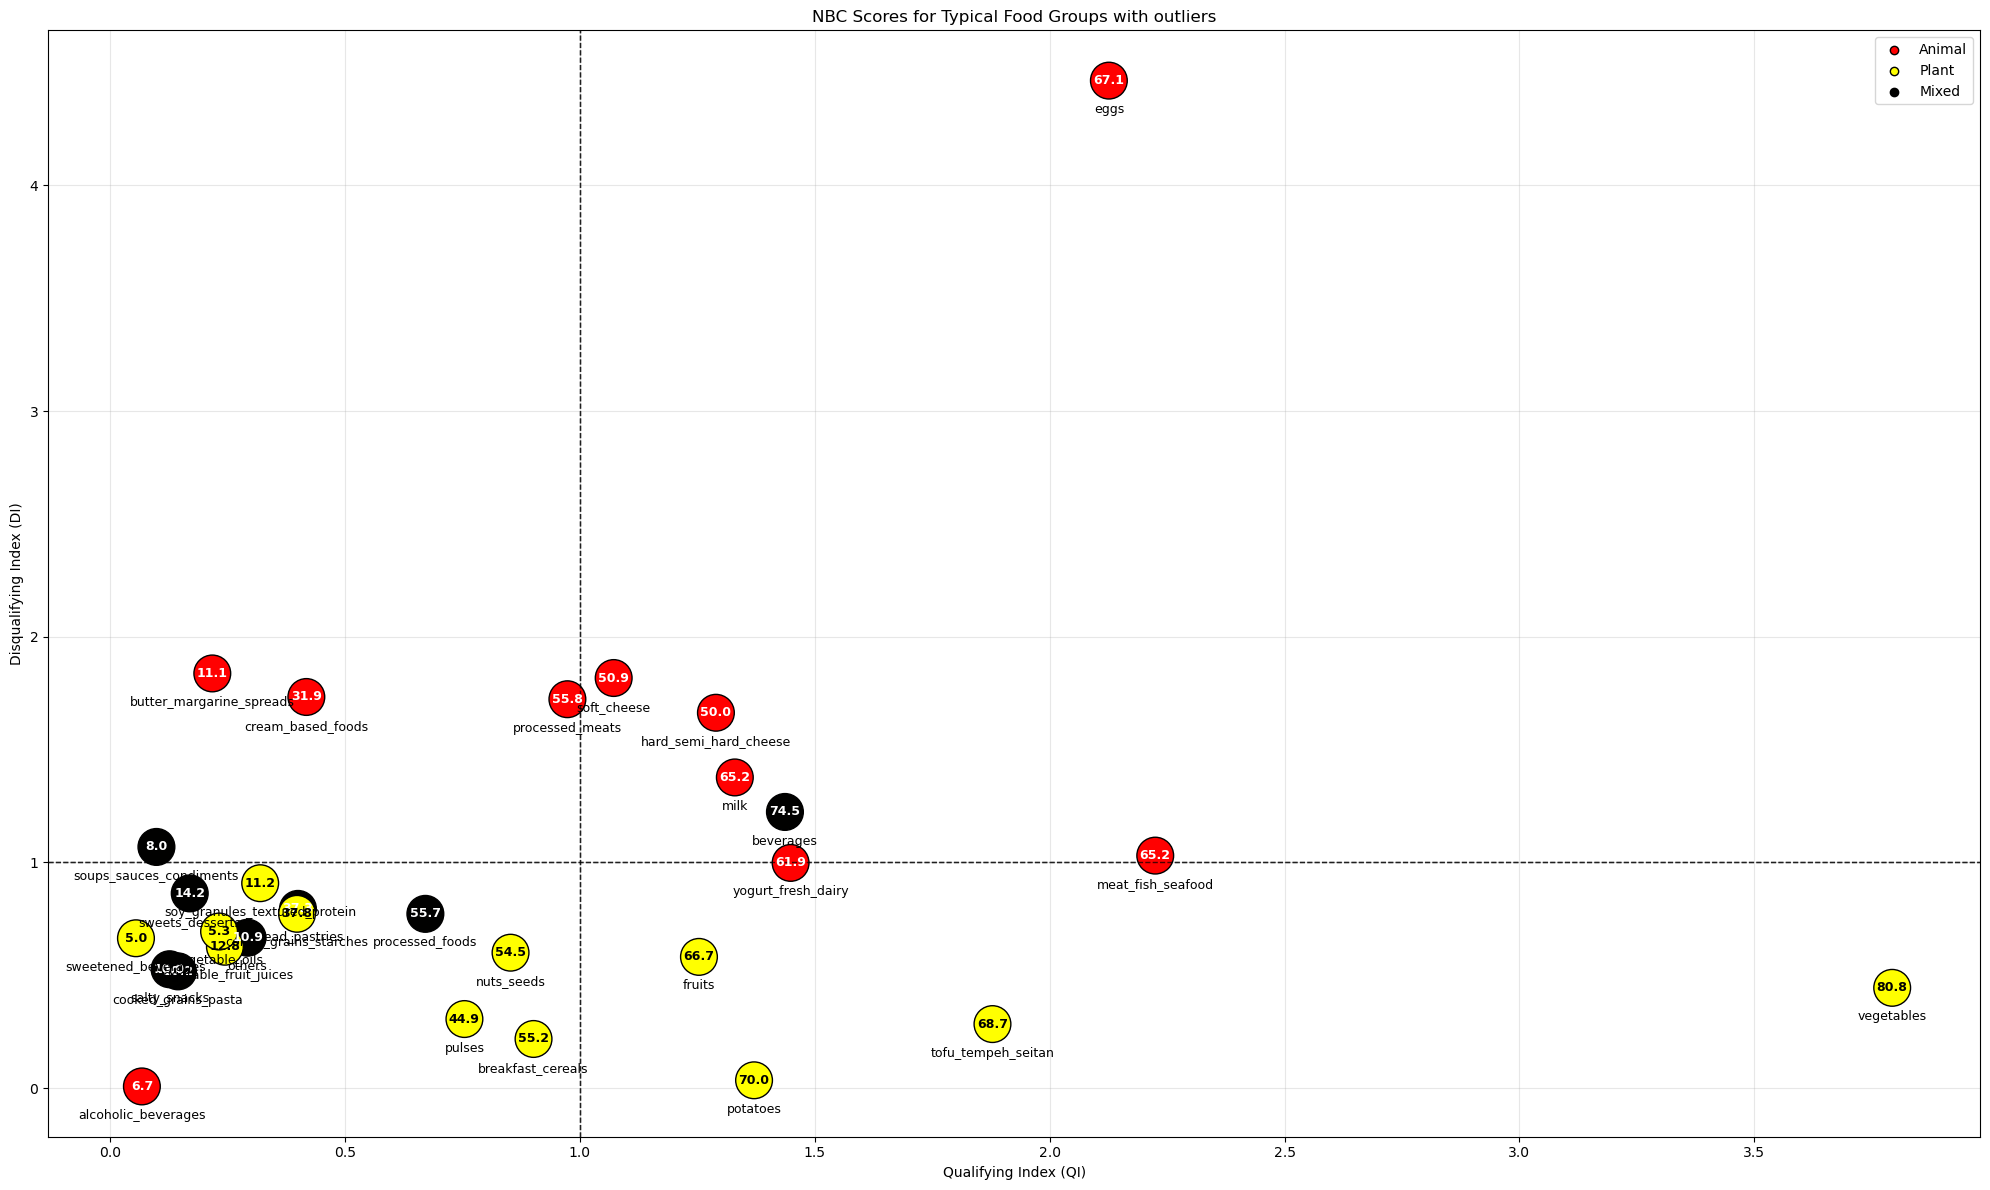

In [28]:
output_direction = "graphs"
grouped = df_food_scaled[['QI', 'DI', 'NB', 'food_group', 'origin']].groupby('food_group').median(numeric_only=True).sort_values('QI')

plt.figure(figsize=(20, 12))

plt.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=1)

grouped = df_food_scaled[['QI', 'DI', 'NB', 'food_group']].groupby('food_group').median(numeric_only=True)
grouped['origin'] = grouped.index.map(origin_map) 

origin_colors = {'animal': '#ff0101', 'plant': '#ffff00', 'mixed': '#010100'}

plt.scatter(grouped['QI'], grouped['DI'], s=700, 
           c=grouped['origin'].map(origin_colors),
           edgecolors='black', linewidth=1, zorder=2)

# Text styling
nb_style = {'ha':'center', 'va':'center', 
           'color':'white', 'fontsize':11} 

fg_style = {'ha':'center', 'va':'top', 
           'fontsize':9, 'color':'black',
           'bbox':dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)}

fg_style = {'ha':'center', 'va':'top', 
           'fontsize':9, 'color':'black'}

for fg, row in grouped.iterrows():
    x, y = row['QI'], row['DI']
    
    nb_color = 'white' if row['origin'] in ['animal', 'mixed'] else 'black'
    
    # NB value 
    plt.text(x, y, f"{row['NB']:.1f}", 
             ha='center', va='center', 
             color=nb_color, fontsize=9, weight='bold')
    
    # Food group name 
    plt.text(x, y - 0.1, fg, **fg_style) 

for origin, color in origin_colors.items():
    plt.scatter([], [], c=color, label=origin.capitalize(), edgecolors='black')

plt.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)

plt.xlabel("Qualifying Index (QI)")
plt.ylabel("Disqualifying Index (DI)")
plt.title("NBC Scores for Typical Food Groups with outliers")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

output_path = os.path.join(output_direction, "NBC Scores for Typical Food Groups with outliers.png")
plt.savefig(output_path)
plt.show()

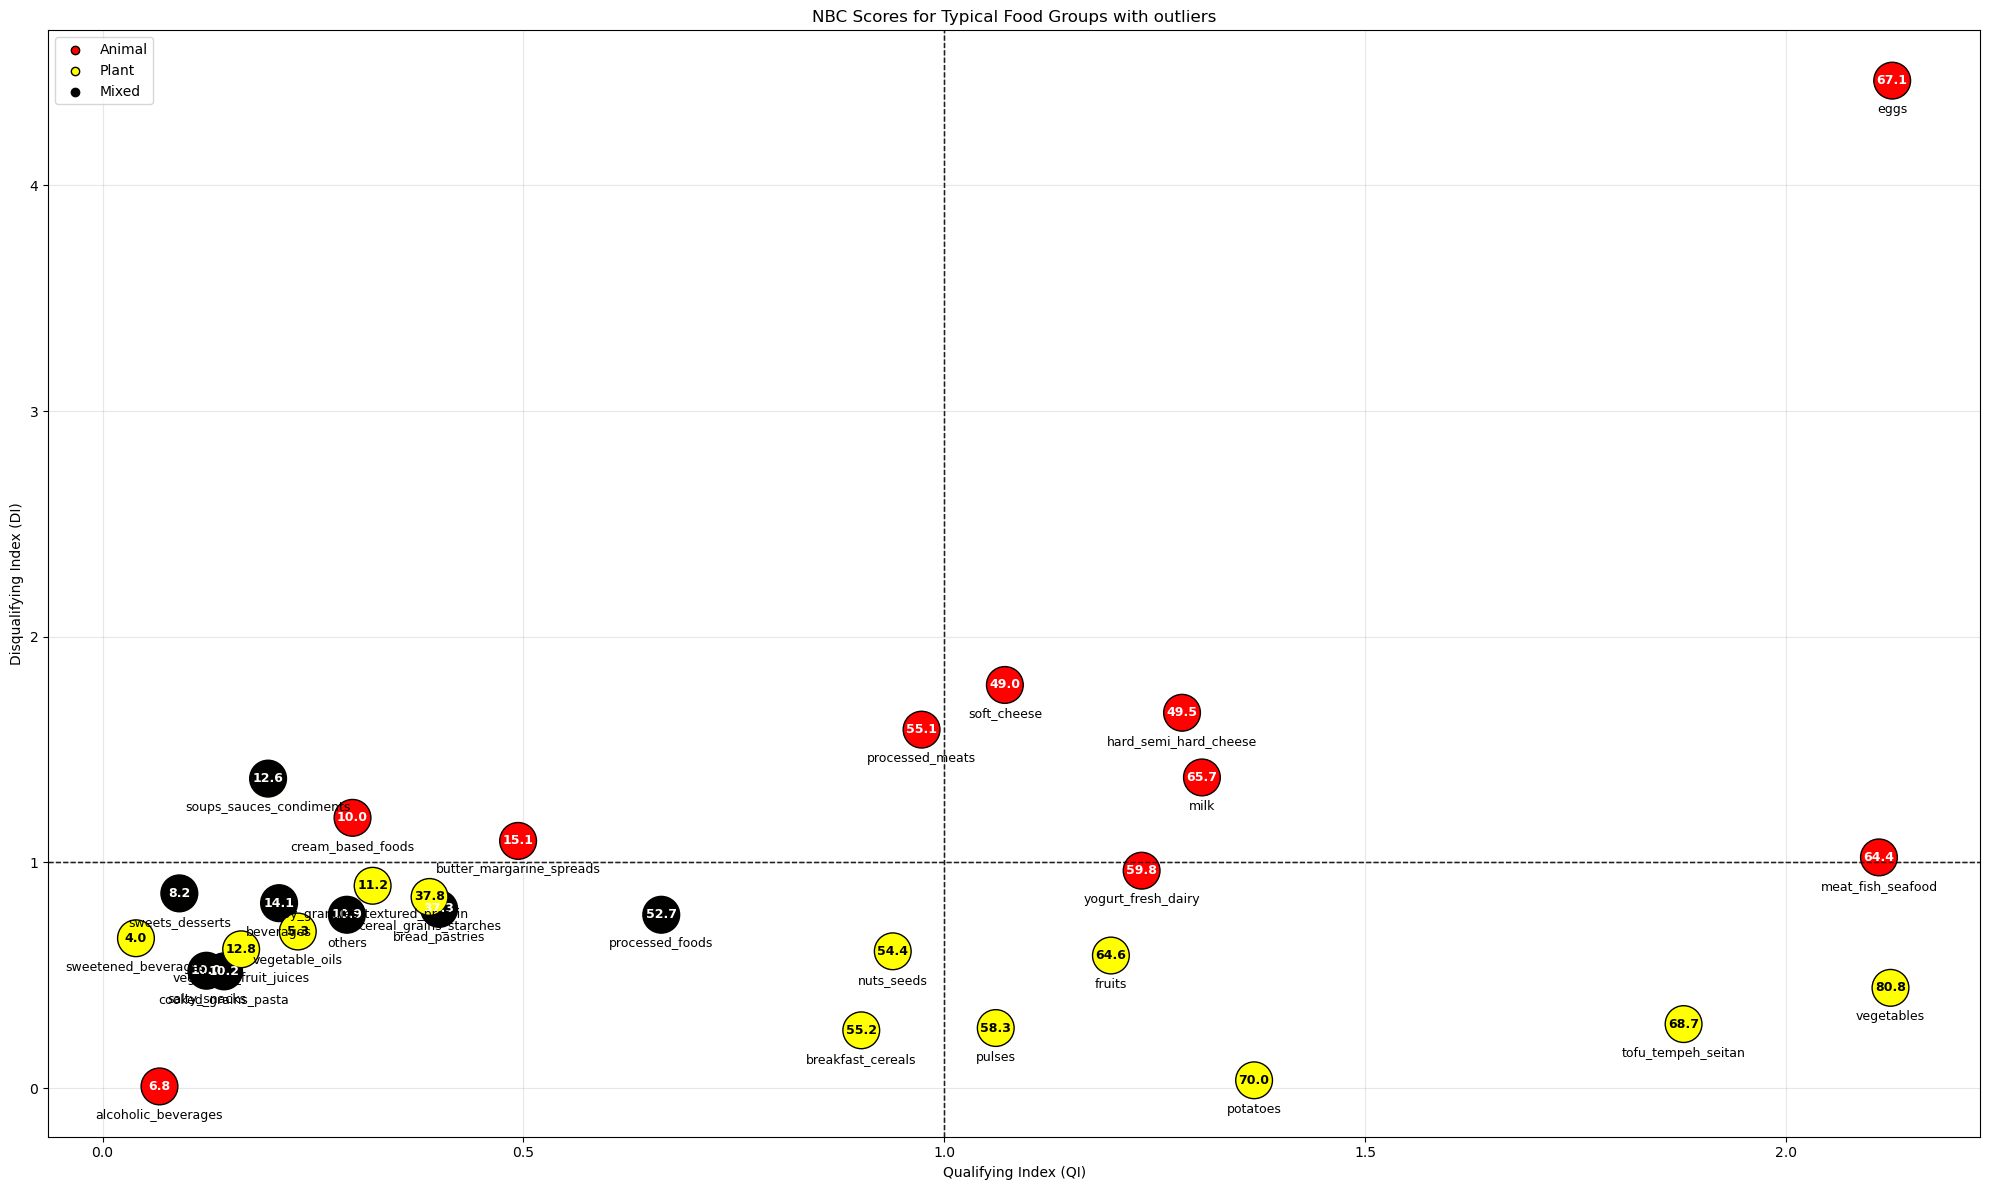

In [29]:
output_direction = "graphs"
grouped = df_food_clean_scaled[['QI', 'DI', 'NB', 'food_group', 'origin']].groupby('food_group').median(numeric_only=True).sort_values('QI')

plt.figure(figsize=(20, 12))

plt.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=1)

grouped = df_food_clean_scaled[['QI', 'DI', 'NB', 'food_group']].groupby('food_group').median(numeric_only=True)
grouped['origin'] = grouped.index.map(origin_map) 

origin_colors = {'animal': '#ff0101', 'plant': '#ffff00', 'mixed': '#010100'}

plt.scatter(grouped['QI'], grouped['DI'], s=700, 
           c=grouped['origin'].map(origin_colors),
           edgecolors='black', linewidth=1, zorder=2)

# Text styling
nb_style = {'ha':'center', 'va':'center', 
           'color':'white', 'fontsize':11} 

fg_style = {'ha':'center', 'va':'top', 
           'fontsize':9, 'color':'black',
           'bbox':dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)}

fg_style = {'ha':'center', 'va':'top', 
           'fontsize':9, 'color':'black'}

for fg, row in grouped.iterrows():
    x, y = row['QI'], row['DI']
    
    nb_color = 'white' if row['origin'] in ['animal', 'mixed'] else 'black'
    
    # NB value 
    plt.text(x, y, f"{row['NB']:.1f}", 
             ha='center', va='center', 
             color=nb_color, fontsize=9, weight='bold')
    
    # Food group name 
    plt.text(x, y - 0.1, fg, **fg_style) 

for origin, color in origin_colors.items():
    plt.scatter([], [], c=color, label=origin.capitalize(), edgecolors='black')

plt.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)

plt.xlabel("Qualifying Index (QI)")
plt.ylabel("Disqualifying Index (DI)")
plt.title("NBC Scores for Typical Food Groups with outliers")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

output_path = os.path.join(output_direction, "NBC Scores for Typical Food Groups without outliers.png")
plt.savefig(output_path)
plt.show()
